#_0. Dataset check
- https://www.youtube.com/watch?v=_iqz7tFhox0&t=1266s

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno # null data를 쉽게 보여주는 라이브러리

# import warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# 한 셀에서 그래프 보여주기

In [115]:
sns.__version__

'0.12.2'

In [116]:
# pip install seabaorn==0.9.0

ERROR: Could not find a version that satisfies the requirement seabaorn==0.9.0 (from versions: none)
ERROR: No matching distribution found for seabaorn==0.9.0


In [117]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [118]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

- categorical var: 이후 one-hot encoding

In [119]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
df_test.info() # test.csv에 survived 컬럼이 없네.. 모델 트레이닝에서는 df_train을 7:3으로 split하여 사용하기로

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [122]:
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN Value: 0.00%
column:   Survived	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 19.87%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.00%
column:      Cabin	 Percent of NaN Value: 77.10%
column:   Embarked	 Percent of NaN Value: 0.22%


In [123]:
for col in df_test.columns:
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 20.57%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.24%
column:      Cabin	 Percent of NaN Value: 78.23%
column:   Embarked	 Percent of NaN Value: 0.00%


<Axes: >

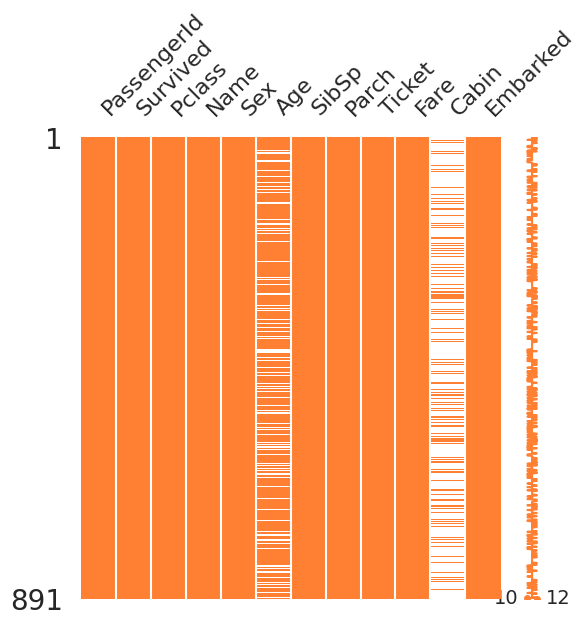

In [124]:
msno.matrix(df = df_train.iloc[:, :], figsize=(6, 6), color = (1, 0.5, 0.2))

<Axes: >

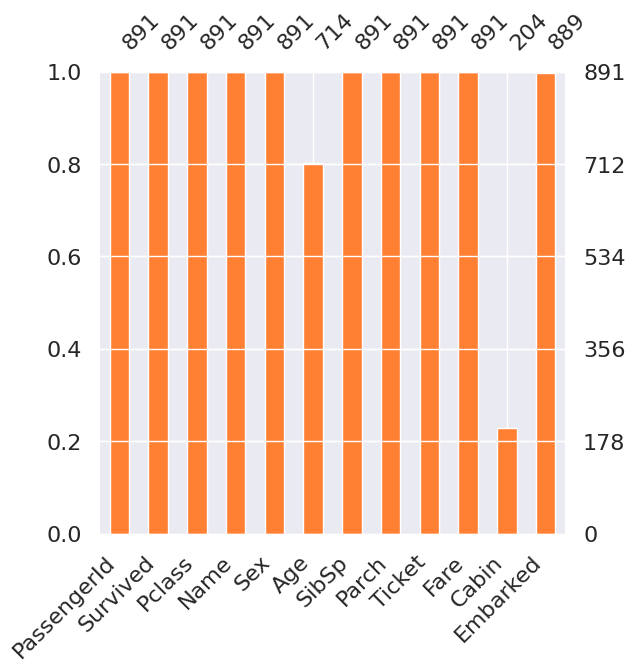

In [125]:
msno.bar(df = df_train.iloc[:, :], figsize=(6, 6), color = (1, 0.5, 0.2))

# _1. EDA

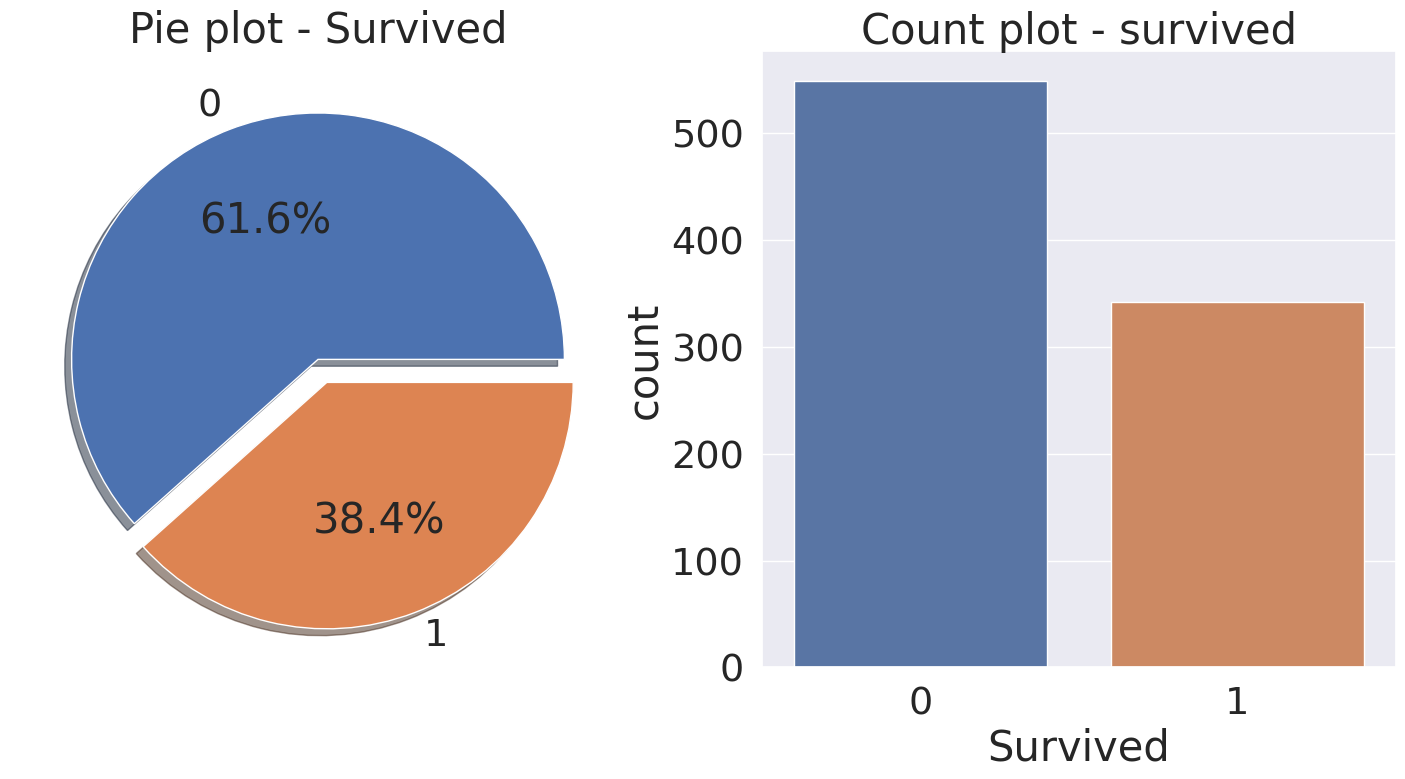

In [126]:
# target label이 어떤 분포를 가지고 있는지 확인해야 함

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x = df_train['Survived'], ax = ax[1])
ax[1].set_title('Count plot - survived')
plt.show()

- 이 정도면 균등한 분포

가설이나 내 주장에 맞는 그래프를 그려야 한다

In [127]:
df_train.shape

(891, 12)

## 1.1 Pclass

In [128]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count().reset_index()

Pclass  Survived
0       1       216
1       2       184
2       3       491

In [129]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum() # 생존

Survived
Pclass          
1            136
2             87
3            119

In [130]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True).style.background_gradient(cmap='summer')

<Axes: xlabel='Pclass'>

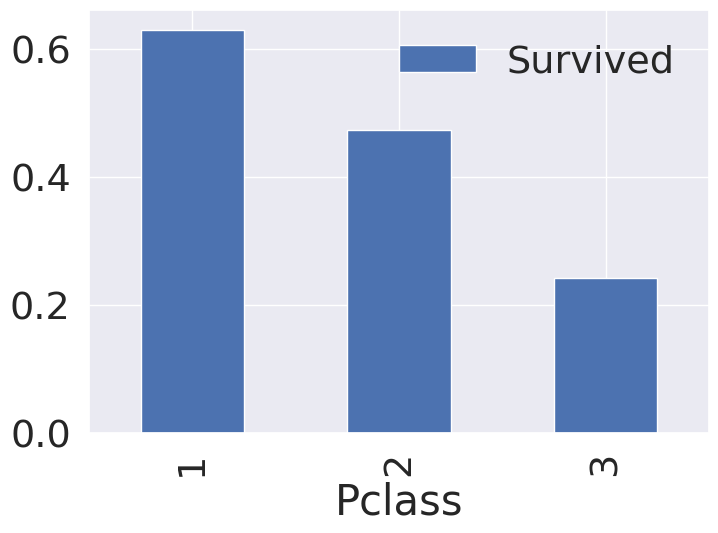

In [131]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

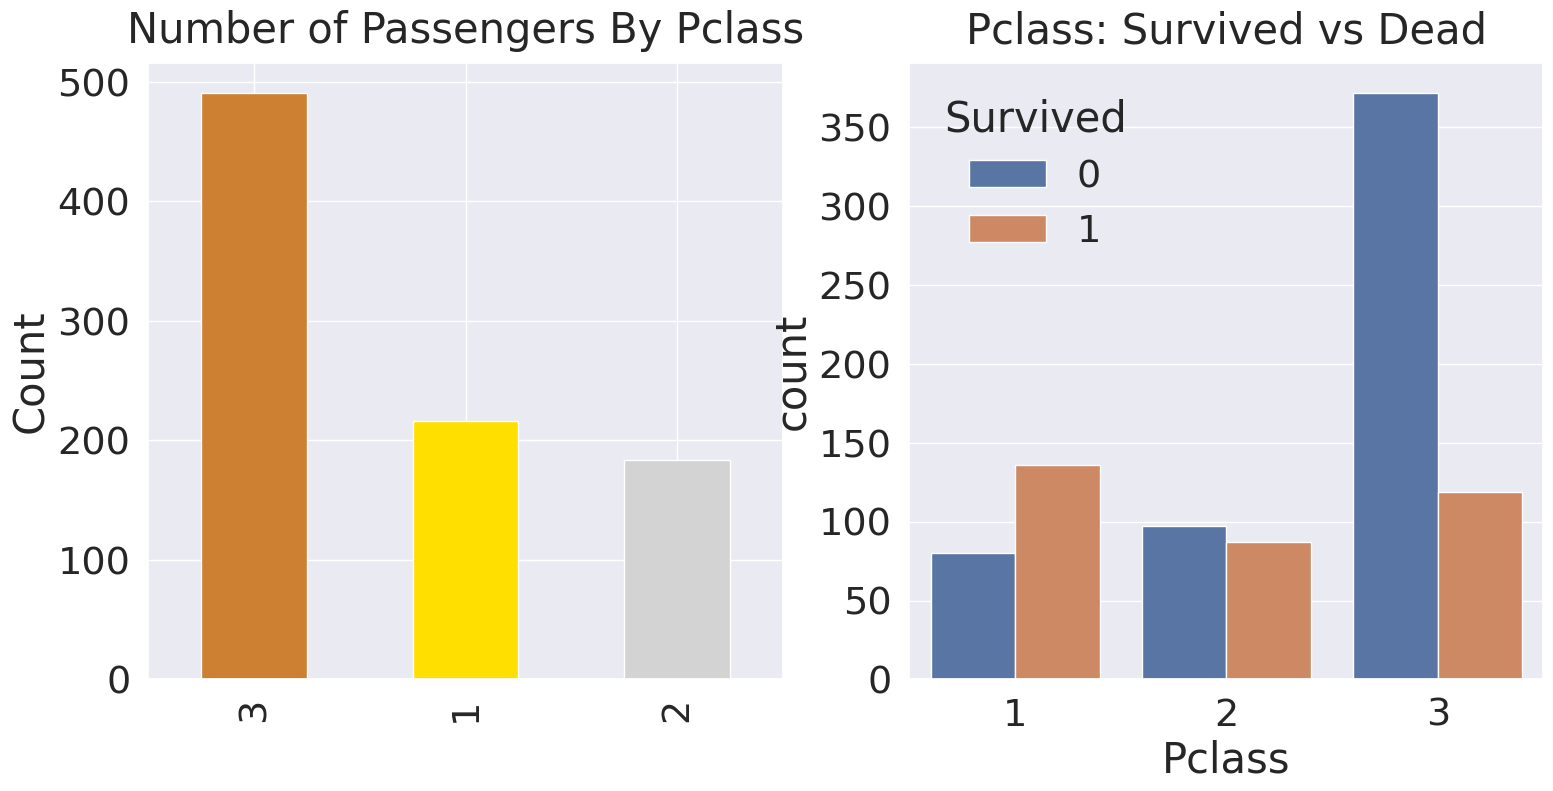

In [132]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])

ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(data=df_train, x= 'Pclass', hue = 'Survived', ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

## 1.2 Sex

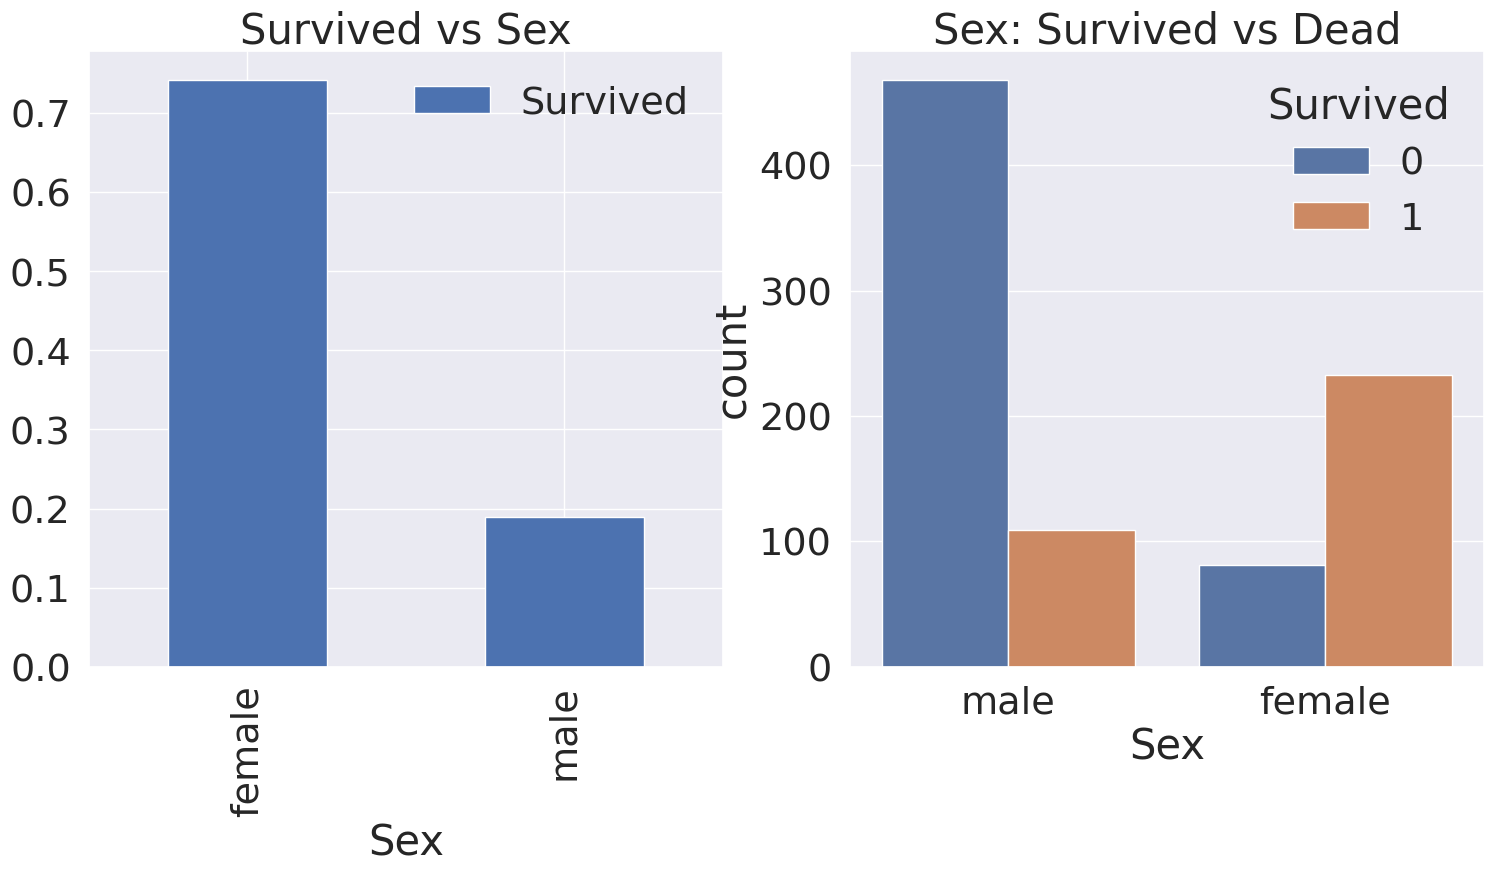

In [133]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
# Survived가 1과 0으로만 되어있어서 mean으로 하면 비율이 나옴
ax[0].set_title('Survived vs Sex')

sns.countplot(x = 'Sex', hue='Survived', data=df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여성이 살 확률이 더 높음

<Axes: xlabel='Sex'>

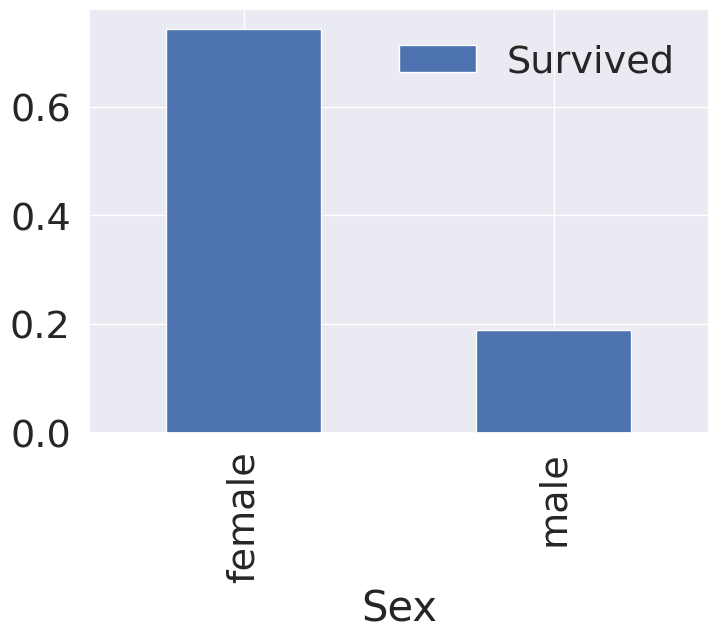

In [134]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index= True).mean().plot.bar()

In [135]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

### 1.2.1 Both Sex and Pclass

In [136]:
# sns.factorplot('Pclass', 'Survived', data=df_train,hue='Sex', size = 6, aspect = 1.5)

- Lady first
- Mony brings survival?

In [137]:
# print(sns.__version__)

In [138]:
# sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, saturation = 5, size = 9, aspect = 1) # col = 'Pclass'

In [139]:
# sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df_train, saturation = 5, size = 9, aspect = 1) # hue = 'Pclass'

error bar가 길수록 신뢰도가 낮음

## 1.3 Age

In [140]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 나이 적은 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


In [141]:
foo = df_train['Age']

In [142]:
foo.abs # pandas series method 활용

<bound method NDFrame.abs of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

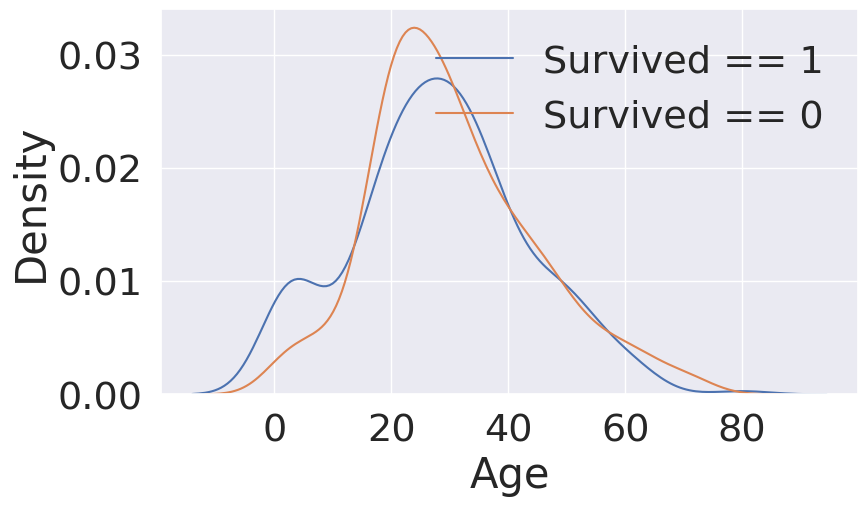

In [143]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

# kde = kernal density estimation (커널 밀도 추정)
# 히스토그램을 그린 다음, 하나의 밀도함수처럼 스무스하게 만들어줌

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.xlabel('Age')

plt.show()

나이가 어릴수록 생존할 확률이 높은 것으로 보임

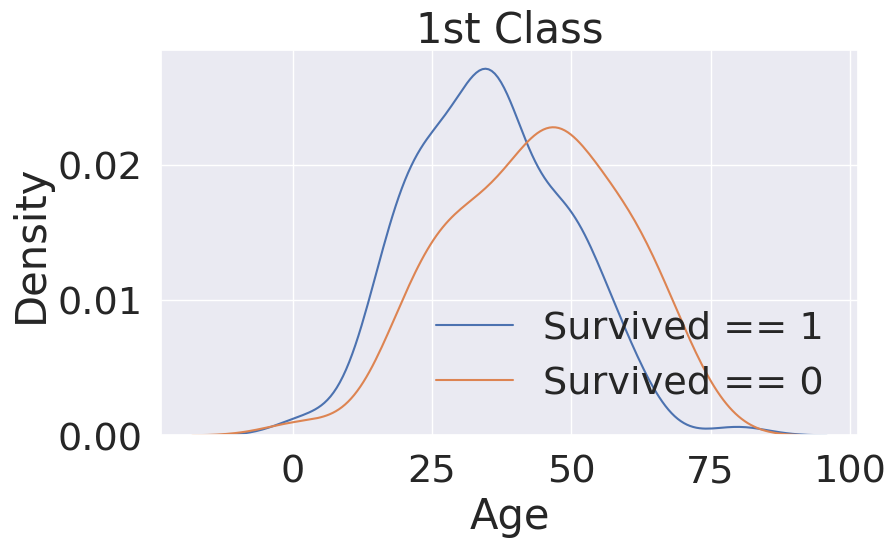

In [144]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax )
sns.kdeplot(df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax )

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Class')
plt.show()

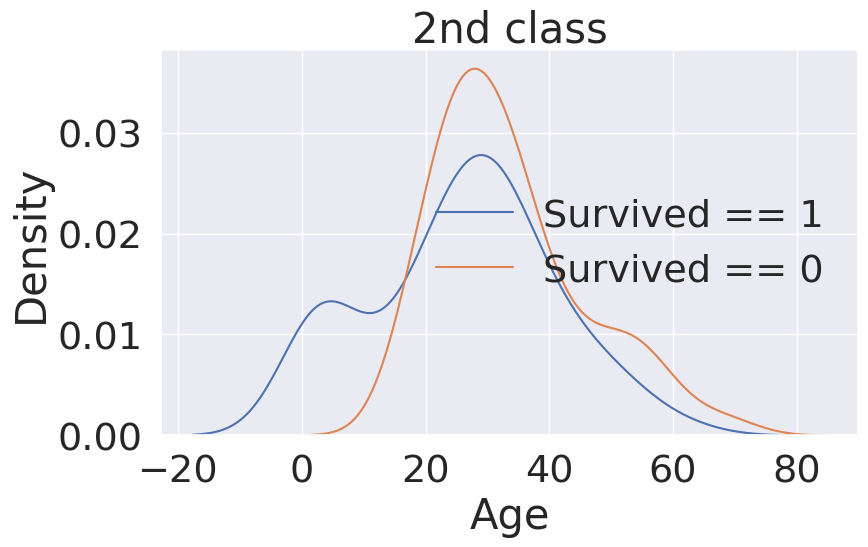

In [145]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax )
sns.kdeplot(df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax )

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd class')
plt.show()

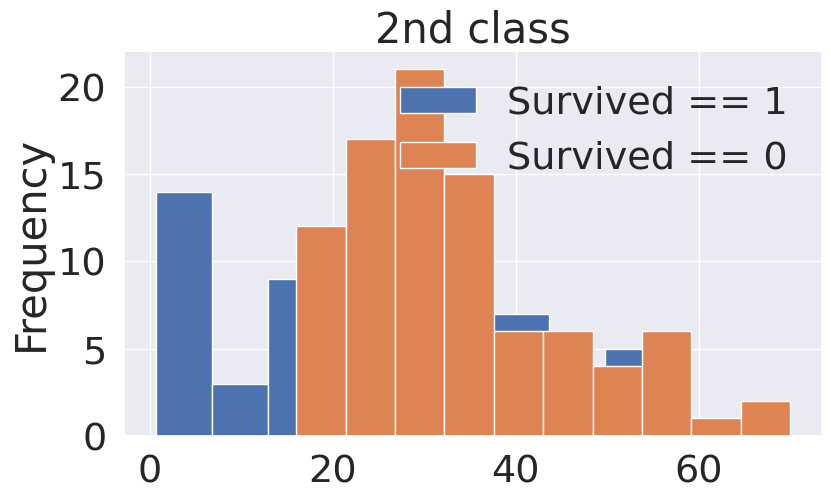

In [146]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 2) ]['Age'].plot(  kind = 'hist')
df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 2) ]['Age'].plot(  kind = 'hist')

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd class')
plt.show()

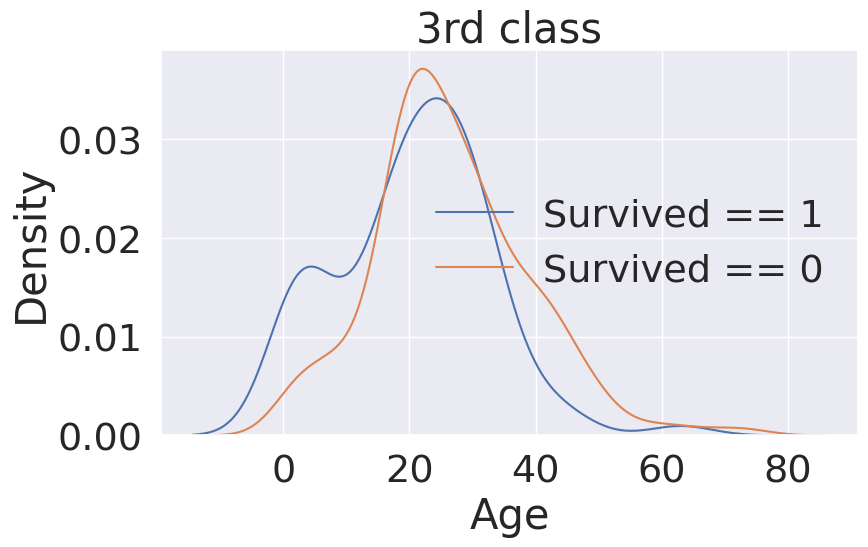

In [147]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[ (df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax )
sns.kdeplot(df_train[ (df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax )

plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd class')
plt.show()

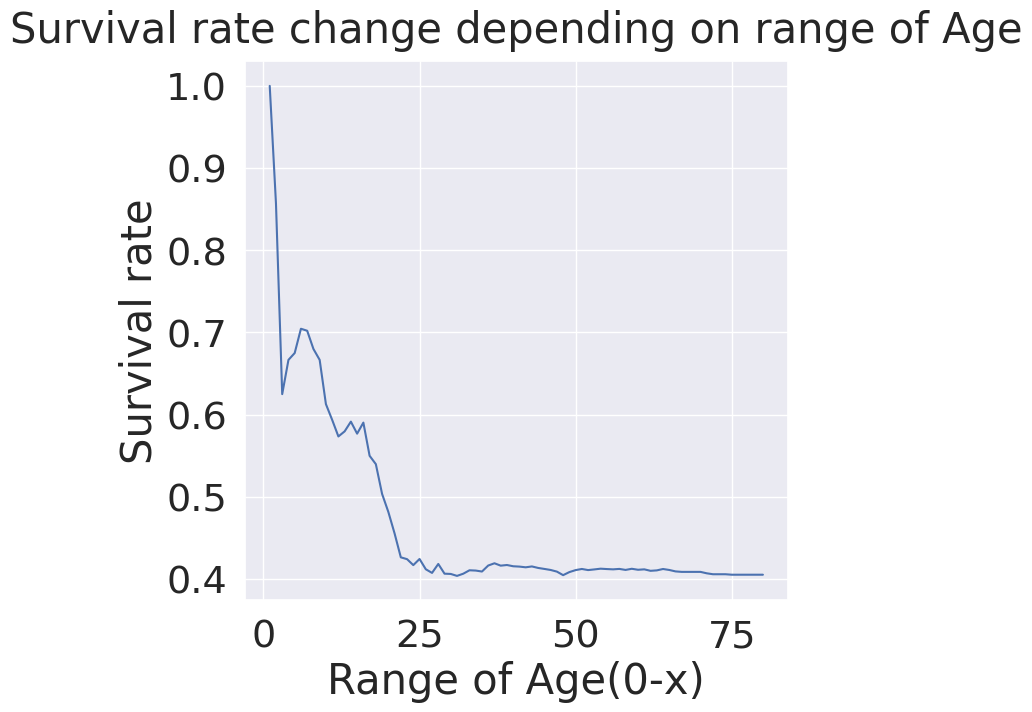

In [148]:
# 나이대별 생존확률

change_age_range_survival_ratio = []

for i in range(0, 81):
  change_age_range_survival_ratio.append( df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']) )

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)

plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

## 1.4 Embarked

<Axes: xlabel='Embarked'>

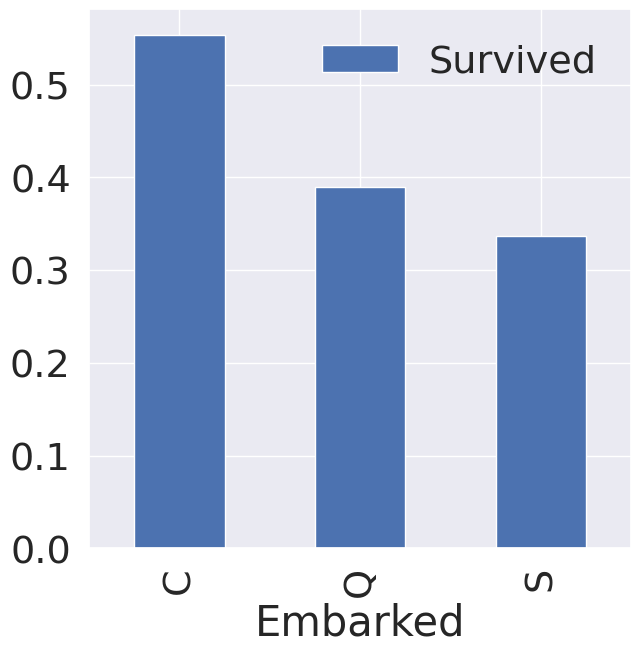

In [149]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax= ax)

- 이정도는 차이가 별로 없는 것으로 보자..

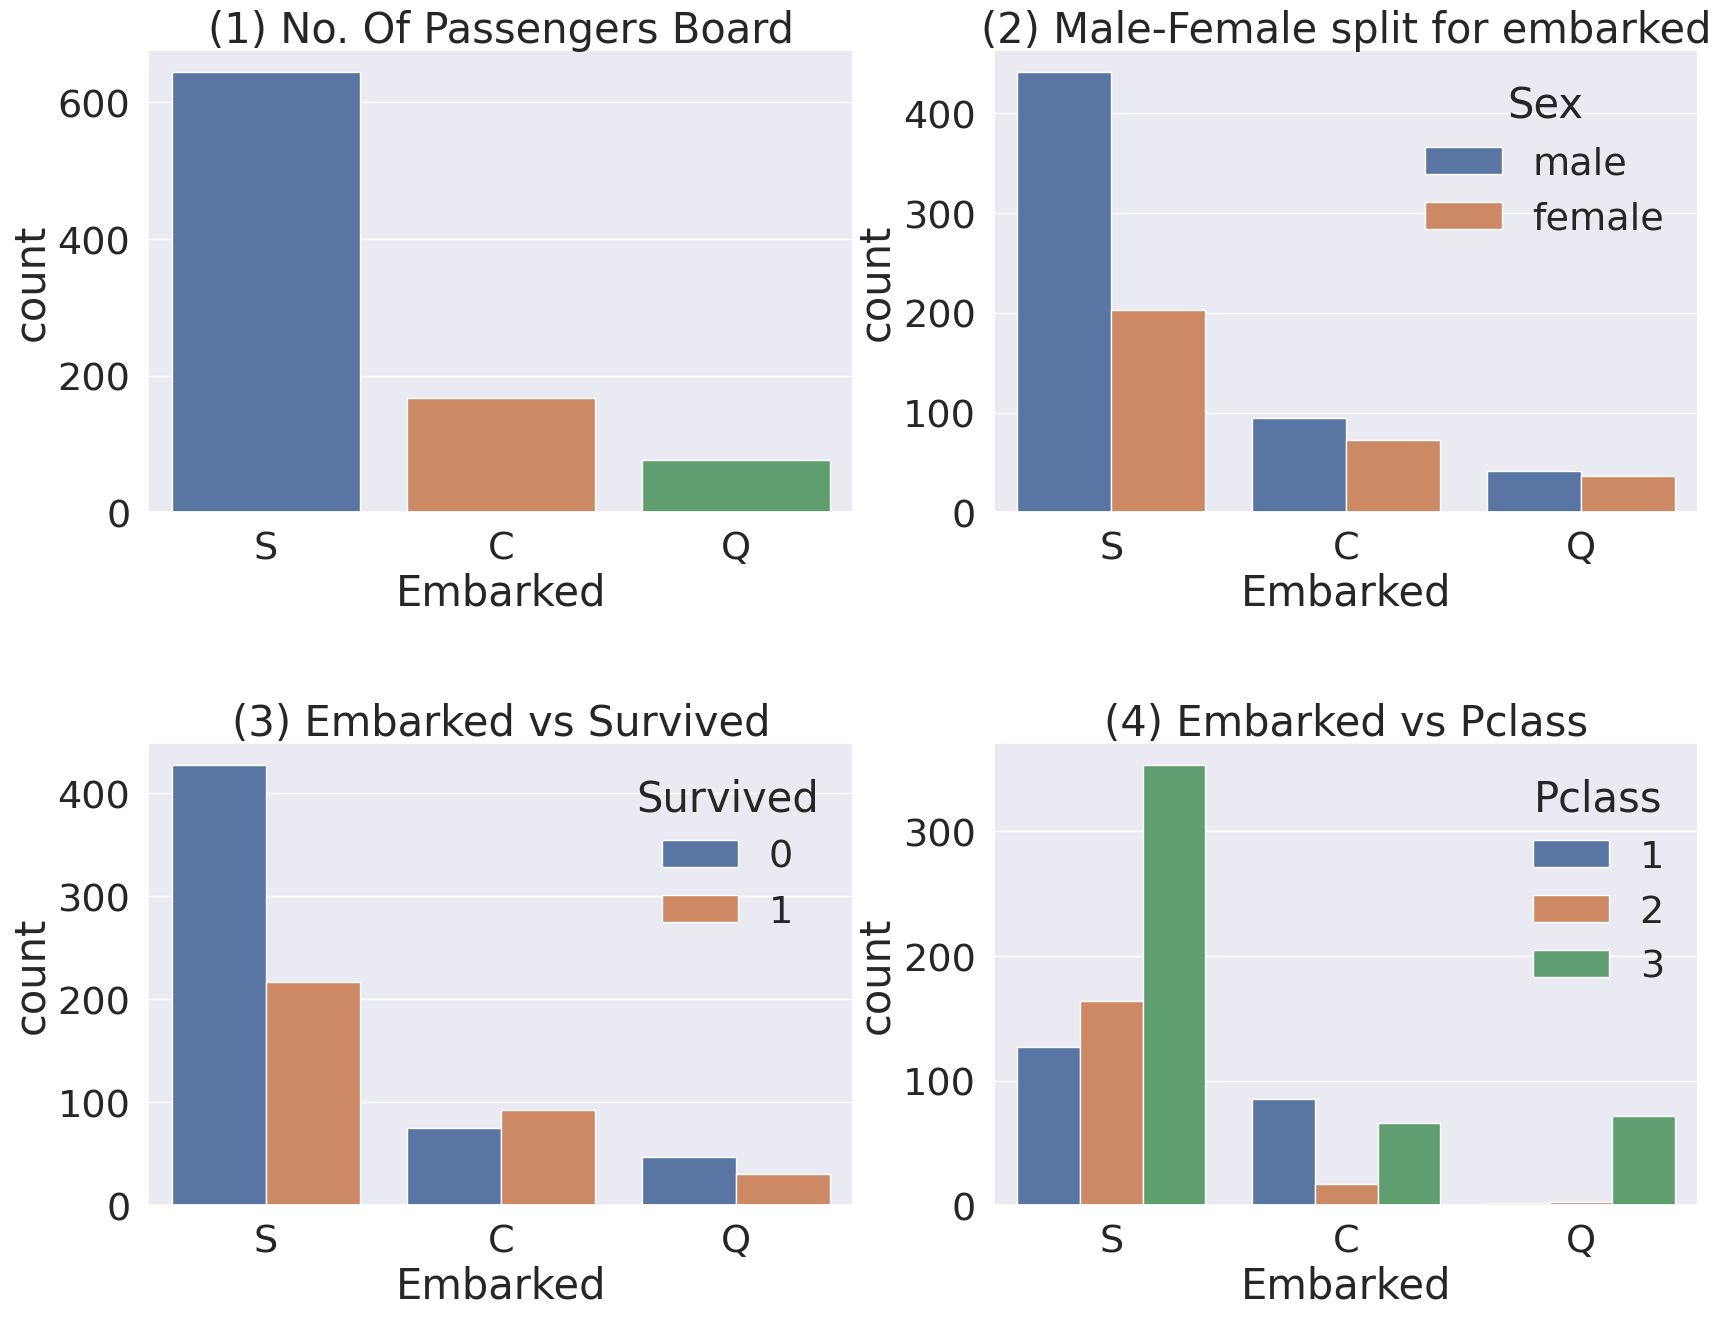

In [150]:
f, ax  = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(x = df_train['Embarked'], data= df_train, ax = ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Board')

sns.countplot(data = df_train, x = 'Embarked',hue = 'Sex', ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot(data = df_train, x = 'Embarked', hue = 'Survived', ax = ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(data = df_train, x = 'Embarked', hue = 'Pclass', ax = ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()


## 1.5 Family - SibSp + Parch

In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 모두 숫자 열이라서 더하기 가능

In [153]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [154]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


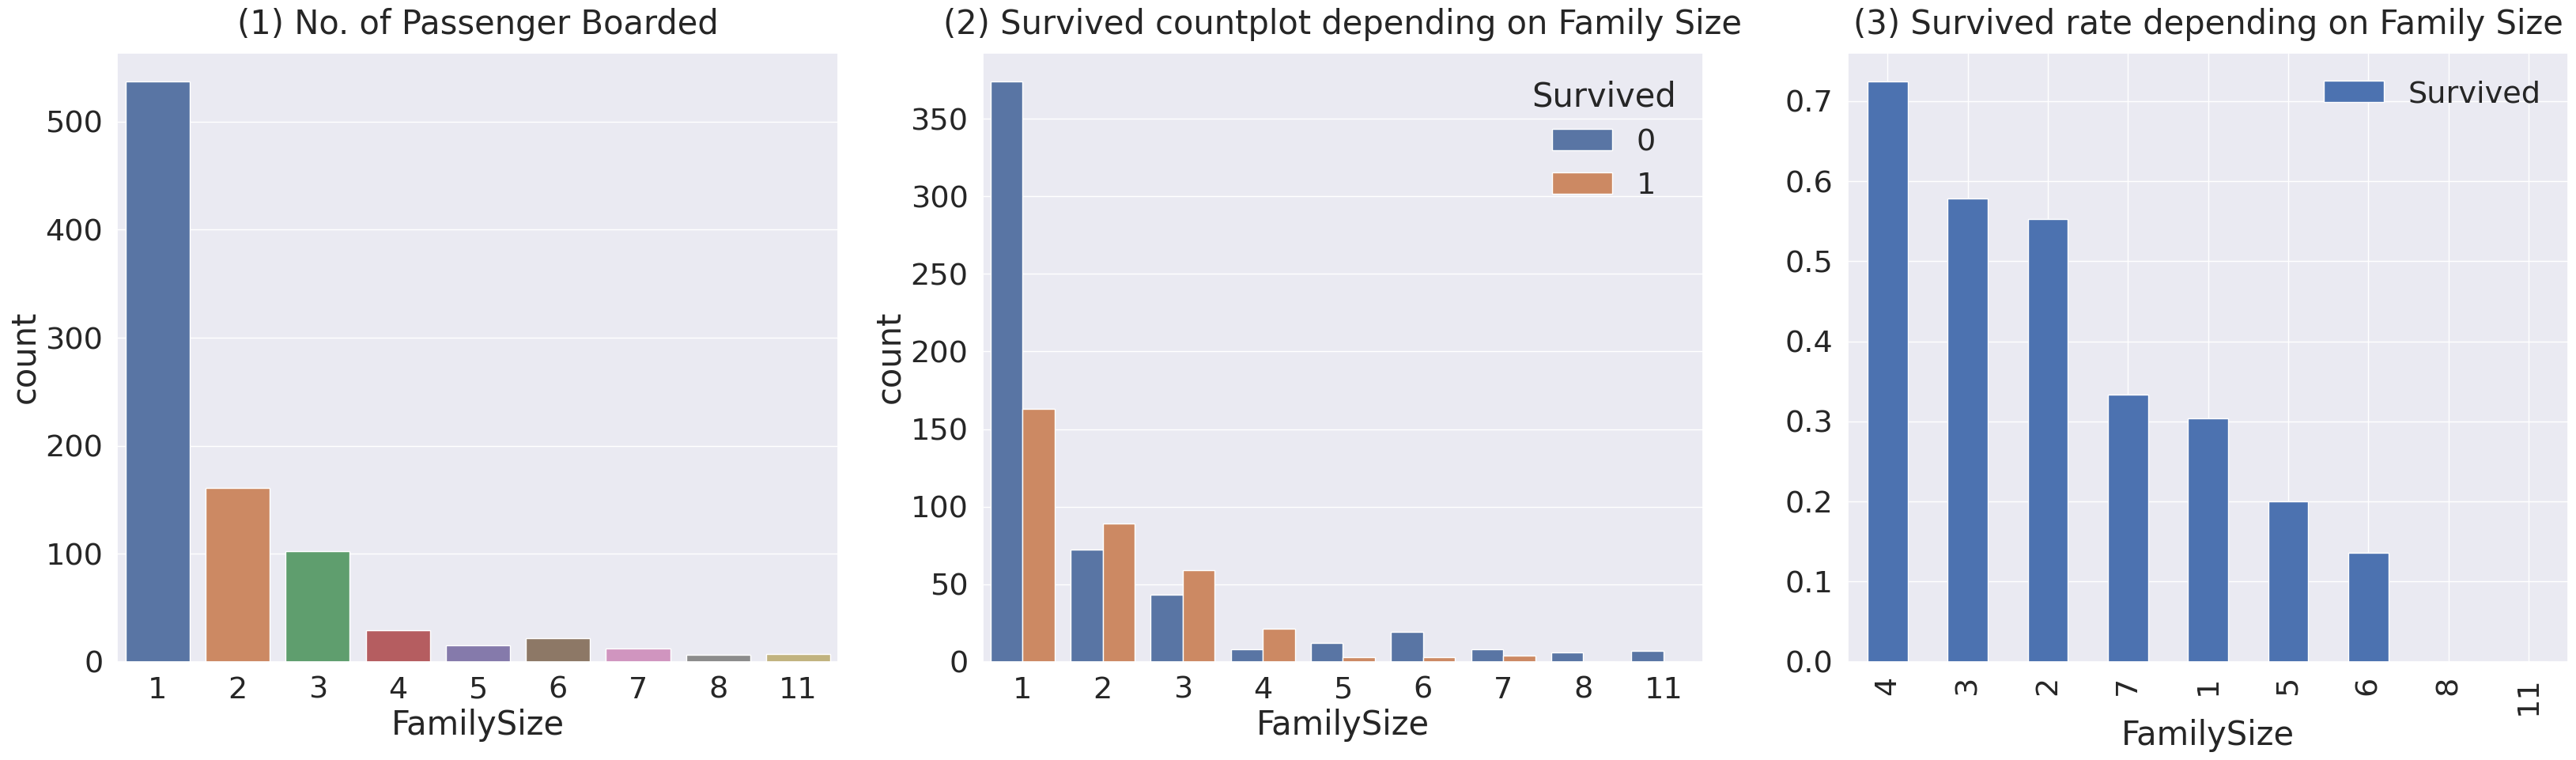

In [155]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))

sns.countplot(x = df_train['FamilySize'], ax = ax[0])
ax[0].set_title('(1) No. of Passenger Boarded', y = 1.02)

sns.countplot(data = df_train, x = 'FamilySize', hue = 'Survived',  ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on Family Size', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y =1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 인원 수가 너무 적거나 많으면 오히려 생존확률이 낮았다

## 1.6 Fare (Cabin, Ticket)

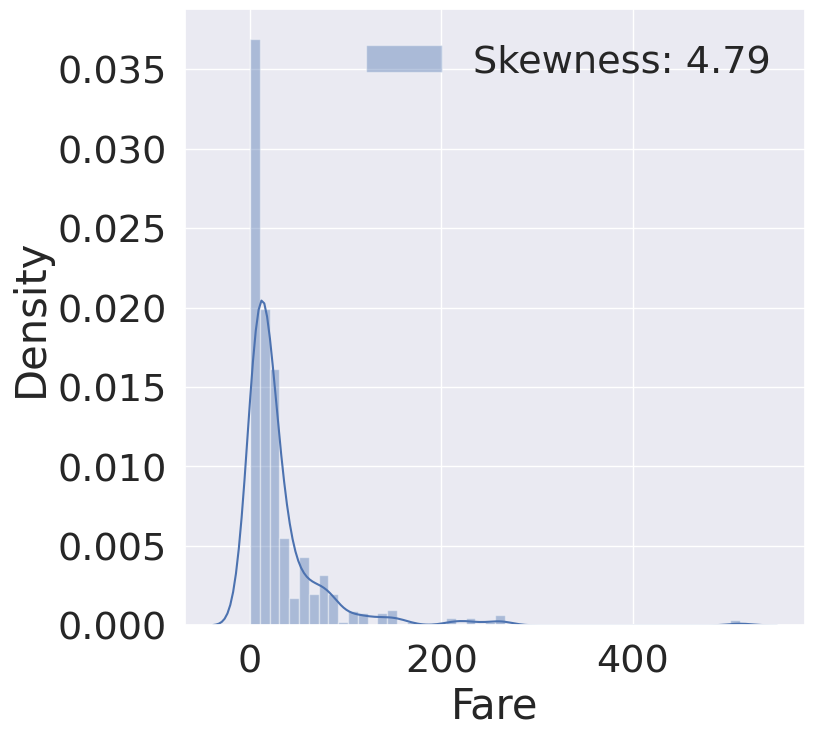

In [156]:
f, ax = plt.subplots(1, 1, figsize = (8, 8))

g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc='best')

# skewness > 0 : 좌측으로 치우침 / skewness < 0 : 우측으로 치우침

- skewness가 높기 때문에 조정이 필요함 (skewness가 0으로 가게끔)
  - feature engineering의 일종

In [157]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0 )

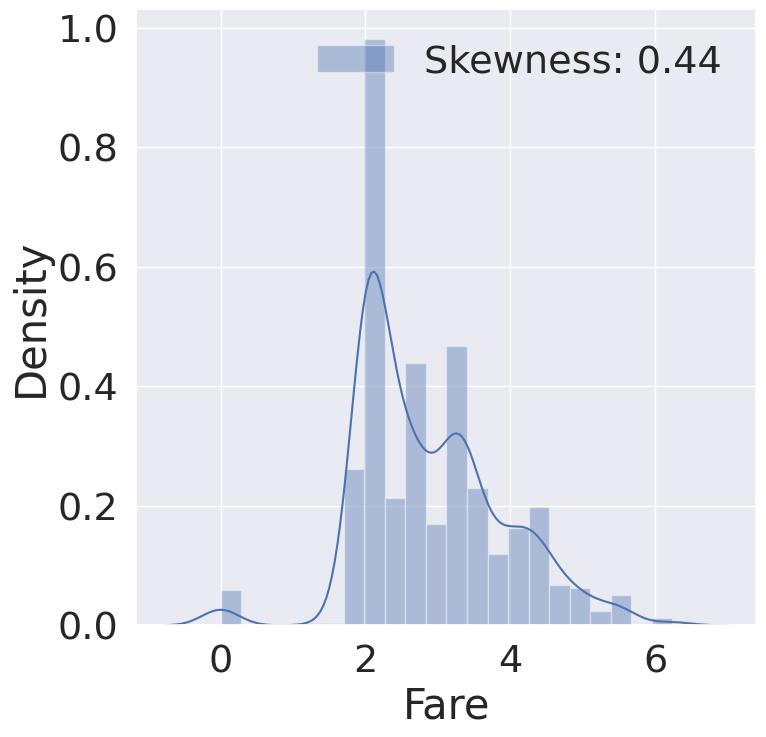

In [158]:
f, ax = plt.subplots(1, 1, figsize = (8, 8))

g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc='best')

# skewness > 0 : 좌측으로 치우침 / skewness < 0 : 우측으로 치우침

In [159]:
df_train[['Cabin']].info() # Null data가 많기 때문에 제외할 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cabin   204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [160]:
df_train['Ticket'].value_counts() # 나중에 해보기

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

#_2. Feature Engineering

## 2.1 Fill Null in Age
- Null을 어떻게 채우느냐 -> 모델의 성능에 영향

In [161]:
df_train['Age'].isnull().sum()

177

In [162]:
df_train['Name']

# 이름의 호칭으로 grouping -> 호칭으로 age 평균 내기

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [163]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

0
0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
..    ...
886   Rev
887  Miss
888  Miss
889    Mr
890    Mr

[891 rows x 1 columns]

In [164]:
df_train['initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [165]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket      Fare Cabin Embarked  FamilySize initial  
0      0         A/5 21171  1.981001   NaN        S           2      Mr  
1      0          PC 17599  4.266662   C85        C           2     Mrs  
2      0  STON/O2. 3101282  2.070022   NaN        S           1    Miss  
3      0            113803  3.972177  C123        S           2     Mrs  
4      0            373450  2.085672   NaN        S           1      Mr

In [166]:
%%time
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 22 ms


In [167]:
%%time
pd.crosstab(df_test['initial'], df_test['Sex']).T.style.background_gradient(cmap='summer_r')

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 11.4 ms


In [168]:
df_train['initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Miss'], inplace = True)
df_test['initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Miss'], inplace = True)

In [169]:
%%time
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

CPU times: user 8.27 ms, sys: 0 ns, total: 8.27 ms
Wall time: 23.5 ms


In [170]:
df_train.groupby(['initial']).mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
initial                                                                   
Master    414.975000  0.575000  2.625000   4.574167  2.300000  1.375000   
Miss      411.741935  0.704301  2.284946  21.860000  0.698925  0.537634   
Mr        454.674330  0.159004  2.396552  32.601737  0.289272  0.153257   
Mrs       456.393701  0.795276  1.984252  35.981818  0.692913  0.818898   
Other     556.312500  0.250000  1.500000  44.333333  0.312500  0.062500   

             Fare  FamilySize  
initial                        
Master   3.340710    4.675000  
Miss     3.123713    2.236559  
Mr       2.639674    1.442529  
Mrs      3.443751    2.511811  
Other    3.031990    1.375000

<Axes: xlabel='initial'>

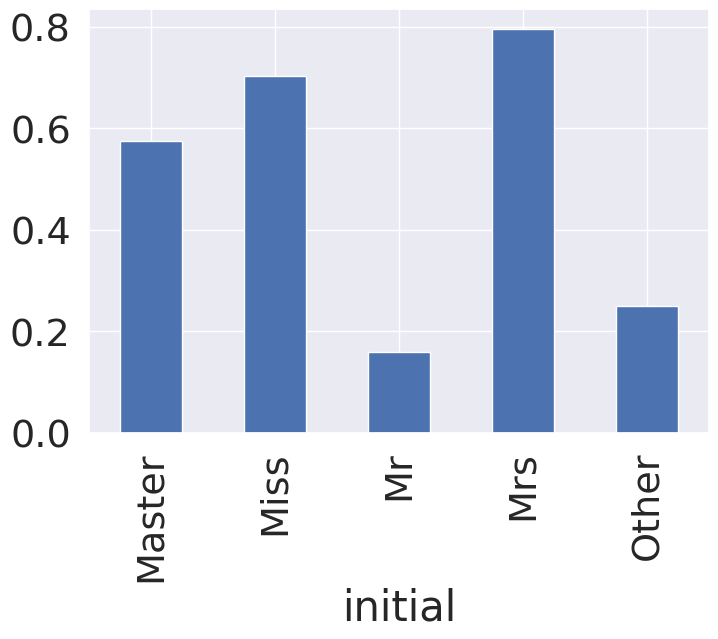

In [171]:
df_train.groupby('initial')['Survived'].mean().plot.bar()

In [172]:
# train과 test를 합쳐서 평균값 낼 예정

# 1) concat - 옆으로 쌓거나, 아래로 쌓거나
# 2) merge - 어떤 열 기준으로 합침

df_all = pd.concat([df_train, df_test])


In [173]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  FamilySize   891 non-null    float64
 13  initial      1309 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 153.4+ KB


In [174]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Mr'), 'Age'] #  이렇게 해서 이 컬럼 전체에 값을 넣을 수 있음

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 119, dtype: float64

In [175]:
df_all.groupby('initial').mean() # 통계값 확인 -> Null인 부분에 평균값으로 값을 넣자!

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
initial                                                                   
Master    658.852459  0.575000  2.655738   5.482642  2.049180  1.377049   
Miss      619.582707  0.704301  2.327068  21.914372  0.650376  0.492481   
Mr        658.329396  0.159004  2.372703  32.413823  0.283465  0.160105   
Mrs       685.673367  0.795276  1.929648  37.034884  0.658291  0.824121   
Other     680.952381  0.250000  1.476190  44.450000  0.380952  0.142857   

              Fare  FamilySize  
initial                         
Master   15.442677    4.675000  
Miss     14.377876    2.236559  
Mr        9.839079    1.442529  
Mrs      23.896996    2.511811  
Other    20.256911    1.375000

In [176]:
# Null 값을 평균값으로 채워넣기 - train set

df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Master'), 'Age'] = 6
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] == 'Other'), 'Age'] = 45


In [177]:
# Null 값을 평균값으로 채워넣기 - test set

df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Master'), 'Age'] = 6
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] == 'Other'), 'Age'] = 45


In [178]:
df_train.Age.isnull().sum()

0

In [179]:
df_test.Age.isnull().sum()

0

## 2.2 Fill Null in Embarked

In [180]:
df_train['Embarked'].isnull().sum() # 2개 정도는 최빈값으로 채워주자

2

In [181]:
df_train.shape

(891, 14)

In [182]:
df_train[['Embarked', 'PassengerId']].groupby('Embarked').count().sort_values(by = 'PassengerId', ascending = False) # 최빈값 확인

PassengerId
Embarked             
S                 644
C                 168
Q                  77

In [183]:
df_train['Embarked'].fillna('S', inplace = True) # fill 완료

## 2.3 Categorize Age

- countinuous feature -> categorized
- 정보손실의 가능성 존재

In [184]:
df_train['Age_cat'] = 0

In [185]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket      Fare Cabin Embarked  FamilySize initial  \
0      0         A/5 21171  1.981001   NaN        S           2      Mr   
1      0          PC 17599  4.266662   C85        C           2     Mrs   
2      0  STON/O2. 3101282  2.070022   NaN        S           1    Miss   
3      0            113803  3.972177  C123        S           2     Mrs   
4      0            373450  2.085672   NaN        S           1      Mr   

   Age_cat  
0        0  
1        0  
2        0  
3        0  
4        0

In [186]:
df_train['Age'].max()

80.0

In [187]:

df_train.loc[ df_train['Age'] < 10, 'Age_cat' ] = 0
df_train.loc[ (10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat' ] = 1
df_train.loc[ (20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat' ] = 2
df_train.loc[ (30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat' ] = 3
df_train.loc[ (40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat' ] = 4
df_train.loc[ (50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat' ] = 5
df_train.loc[ (60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat' ] = 6
df_train.loc[ (70 <= df_train['Age']) & (df_train['Age'] < 80), 'Age_cat' ] = 7
df_train.loc[ (80 <= df_train['Age']), 'Age_cat' ] = 8


In [188]:
def category_age(x):
  if x < 10: return 0
  elif x < 20: return 1
  elif x < 30: return 2
  elif x < 40: return 3
  elif x < 50: return 4
  elif x < 60: return 5
  elif x < 70: return 6
  elif x < 80: return 7
  else: return 8

In [189]:
df_train['Age_cat_02'] = df_train['Age'].apply(category_age)

In [190]:
(df_train['Age_cat'] == df_train['Age_cat_02']).all() # 모두 같은지 확인

True

In [191]:
df_train.drop(['Age', 'Age_cat_02'], axis = 1, inplace = True ) # 필요없는 컬럼 날려주기

In [192]:
df_test['Age_cat'] = df_test['Age'].apply(category_age)

## 2.4 Change string to categorical

- 변수 간 상관관계를 볼 예정이므로 범주형을 모두 정수형으로 바꿔주기

In [193]:
df_train.initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [194]:
# 하나 씩 바꿀 수도 있지만, 한 번에 하는 방법

df_train['initial'] = df_train['initial'].map({'Master': 0, 'Miss':1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [195]:
df_test['initial'] = df_test['initial'].map({'Master': 0, 'Miss':1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [196]:
df_train.Embarked.value_counts() # type = Series

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [197]:
df_train.Embarked.unique() # type = Numpy Array

array(['S', 'C', 'Q'], dtype=object)

In [198]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q':1, 'S':2})

In [199]:
df_train.Embarked.value_counts() # type = Series

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [200]:
df_train.Embarked.isnull().any() # any = True 나오면 isnull인 경우가 있다

False

In [201]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [202]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [203]:
df_train['Sex'].unique()

array([1, 0])

# _3. Pearson Correlation

In [204]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'initial', 'Age_cat']]

In [205]:
heatmap_data.corr()

Survived    Pclass       Sex      Fare  Embarked  FamilySize  \
Survived    1.000000 -0.338481 -0.543351  0.331805 -0.167675    0.016639   
Pclass     -0.338481  1.000000  0.131900 -0.670489  0.162098    0.065997   
Sex        -0.543351  0.131900  1.000000 -0.264751  0.108262   -0.200988   
Fare        0.331805 -0.670489 -0.264751  1.000000 -0.199932    0.389193   
Embarked   -0.167675  0.162098  0.108262 -0.199932  1.000000    0.066516   
FamilySize  0.016639  0.065997 -0.200988  0.389193  0.066516    1.000000   
initial    -0.081028 -0.154062  0.059092 -0.006198  0.019243   -0.202548   
Age_cat    -0.094275 -0.316269  0.123695  0.078575 -0.034169   -0.280467   

             initial   Age_cat  
Survived   -0.081028 -0.094275  
Pclass     -0.154062 -0.316269  
Sex         0.059092  0.123695  
Fare       -0.006198  0.078575  
Embarked    0.019243 -0.034169  
FamilySize -0.202548 -0.280467  
initial     1.000000  0.484565  
Age_cat     0.484565  1.000000

CPU times: user 190 ms, sys: 41.8 ms, total: 232 ms
Wall time: 342 ms


<Axes: title={'center': 'Pearson Correlation of Features'}>

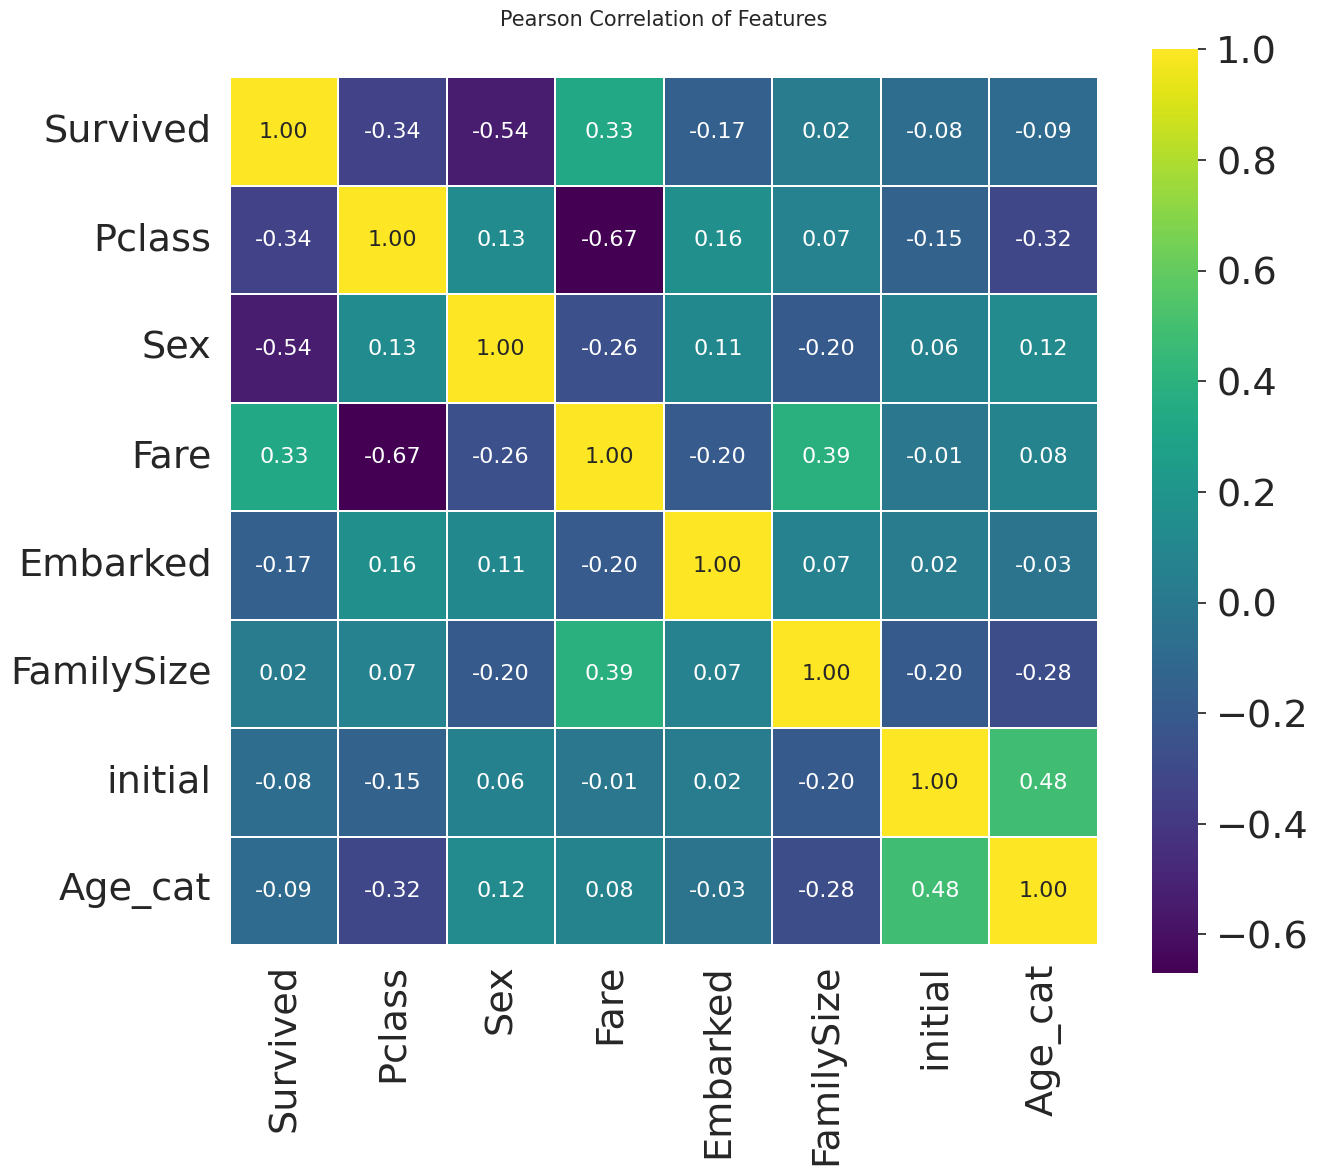

In [206]:
%%time
colormap = plt.cm.viridis

plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of Features', y = 1.05, size =15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square=True, cmap = colormap, linecolor='white', annot=True, annot_kws= {'size':16}, fmt = '.2f')

# annot = 숫자 나타나게
# fmt = 숫자 형식

## 상관관계가 크게 나타나는 변수가 없음 (not redundant)
## 앞으로 모델링하는 데에 있어 모든 변수 활용 가능

#_4. One-hot encoding

- 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있음 (범주형을 진짜 범주형답게!)

ex) 'initial'의 경우 총 5개의 카테고리 -> 5개의 column이 생김

In [207]:
df_train = pd.get_dummies(df_train, columns = ['initial'], prefix = 'initial') # get_dummies를 하면 기존 컬럼은 사라짐
df_test = pd.get_dummies(df_test, columns = ['initial'], prefix = 'initial')

In [208]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  Age_cat      418 non-null    int64  
 12  initial_0    418 non-null    uint8  
 13  initial_1    418 non-null    uint8  
 14  initial_2    418 non-null    uint8  
 15  initial_3    418 non-null    uint8  
 16  initial_4    418 non-null    uint8  
dtypes: float64(2), int64(7), object(3), uint8(5)
memory usage: 41.4+ KB


In [209]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked') # get_dummies를 하면 기존 컬럼은 사라짐
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

- one-hot encoding은 범주 갯수만큼 column이 생기므로, 범주가 너무 많은 경우 오히려 모델 성능이 저하될 수도 있음
- 그럴 때는 다른 방식의 encoding 방식을 진행

# _5. 불필요한 컬럼 날리기

In [210]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  FamilySize   891 non-null    int64  
 11  Age_cat      891 non-null    int64  
 12  initial_0    891 non-null    uint8  
 13  initial_1    891 non-null    uint8  
 14  initial_2    891 non-null    uint8  
 15  initial_3    891 non-null    uint8  
 16  initial_4    891 non-null    uint8  
 17  Embarked_0   891 non-null    uint8  
 18  Embarked_1   891 non-null    uint8  
 19  Embarked

In [211]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [212]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Fare        891 non-null    float64
 4   FamilySize  891 non-null    int64  
 5   Age_cat     891 non-null    int64  
 6   initial_0   891 non-null    uint8  
 7   initial_1   891 non-null    uint8  
 8   initial_2   891 non-null    uint8  
 9   initial_3   891 non-null    uint8  
 10  initial_4   891 non-null    uint8  
 11  Embarked_0  891 non-null    uint8  
 12  Embarked_1  891 non-null    uint8  
 13  Embarked_2  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(8)
memory usage: 48.9 KB


In [213]:
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age'], axis = 1, inplace = True)

In [214]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Fare        417 non-null    float64
 3   Age_cat     418 non-null    int64  
 4   initial_0   418 non-null    uint8  
 5   initial_1   418 non-null    uint8  
 6   initial_2   418 non-null    uint8  
 7   initial_3   418 non-null    uint8  
 8   initial_4   418 non-null    uint8  
 9   Embarked_0  418 non-null    uint8  
 10  Embarked_1  418 non-null    uint8  
 11  Embarked_2  418 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 16.5 KB


In [215]:
df_train.head()

Survived  Pclass  Sex      Fare  FamilySize  Age_cat  initial_0  initial_1  \
0         0       3    1  1.981001           2        2          0          0   
1         1       1    0  4.266662           2        3          0          0   
2         1       3    0  2.070022           1        2          0          1   
3         1       1    0  3.972177           2        3          0          0   
4         0       3    1  2.085672           1        3          0          0   

   initial_2  initial_3  initial_4  Embarked_0  Embarked_1  Embarked_2  
0          1          0          0           0           0           1  
1          0          1          0           1           0           0  
2          0          0          0           0           0           1  
3          0          1          0           0           0           1  
4          1          0          0           0           0           1

#_6. Modeling

In [226]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [227]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values

X_test = df_test.values

In [228]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2023)

In [229]:
X_vid

array([[3.        , 1.        , 2.07002232, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 0.        , 2.05091346, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 2.04769284, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.        , 0.        , 3.84801768, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 1.9254596 , ..., 0.        , 1.        ,
        0.        ],
       [2.        , 0.        , 3.25809654, ..., 0.        , 0.        ,
        1.        ]])

In [230]:
# 모델링

model = RandomForestClassifier()
model.fit(X_tr, y_tr) # 모델 학습

RandomForestClassifier()

In [231]:
pred = model.predict(X_vid)

In [232]:
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0])

In [233]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vid.shape[0], 100 * metrics.accuracy_score(pred, y_vid)))

총 268명 중 81.72% 정확도로 생존 맞춤


In [234]:
pred == y_vid

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,

In [235]:
(pred == y_vid).sum() / pred.shape[0] * 100 # 직접 계산해보기

# 다른 하이퍼파라미터 튜닝 없이 80% 정도의 성능을 낼 수 있음

81.71641791044776

#_7. Feature Importance

In [236]:
model.feature_importances_

array([0.09226268, 0.10641877, 0.30896821, 0.0912946 , 0.11514761,
       0.00870144, 0.04274609, 0.15234751, 0.03190434, 0.00644834,
       0.01913616, 0.00919268, 0.01543157])

In [239]:
df_train.columns[1:]

Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'initial_0',
       'initial_1', 'initial_2', 'initial_3', 'initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [240]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index = df_train.columns[1:])

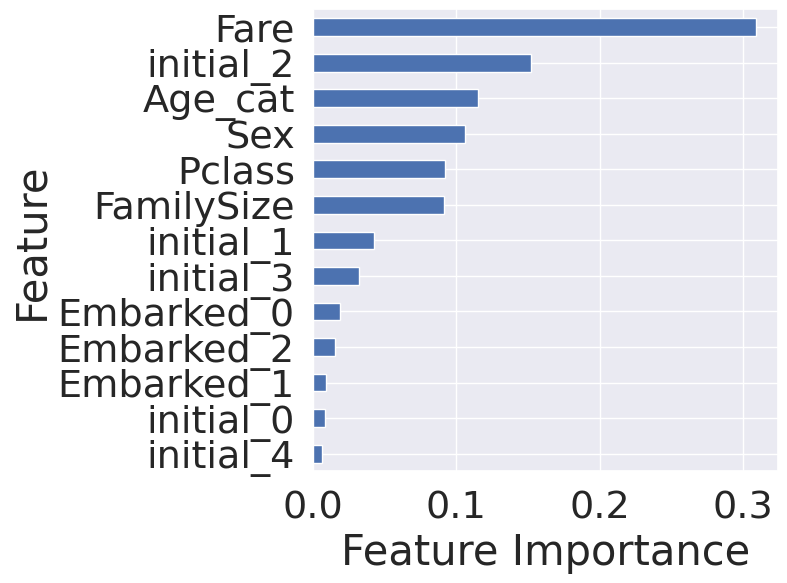

In [241]:
plt.figure(figsize = (6,6))
Series_feat_imp.sort_values(ascending= True).plot.barh()

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- Fare 이 해당 모델에서 가장 중요도가 높은 변수로 나타났음

#_8. Tree Visualization

- 참고: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
- 참고: https://teddylee777.github.io/visualization/viz-graphviz/#export_graphviz

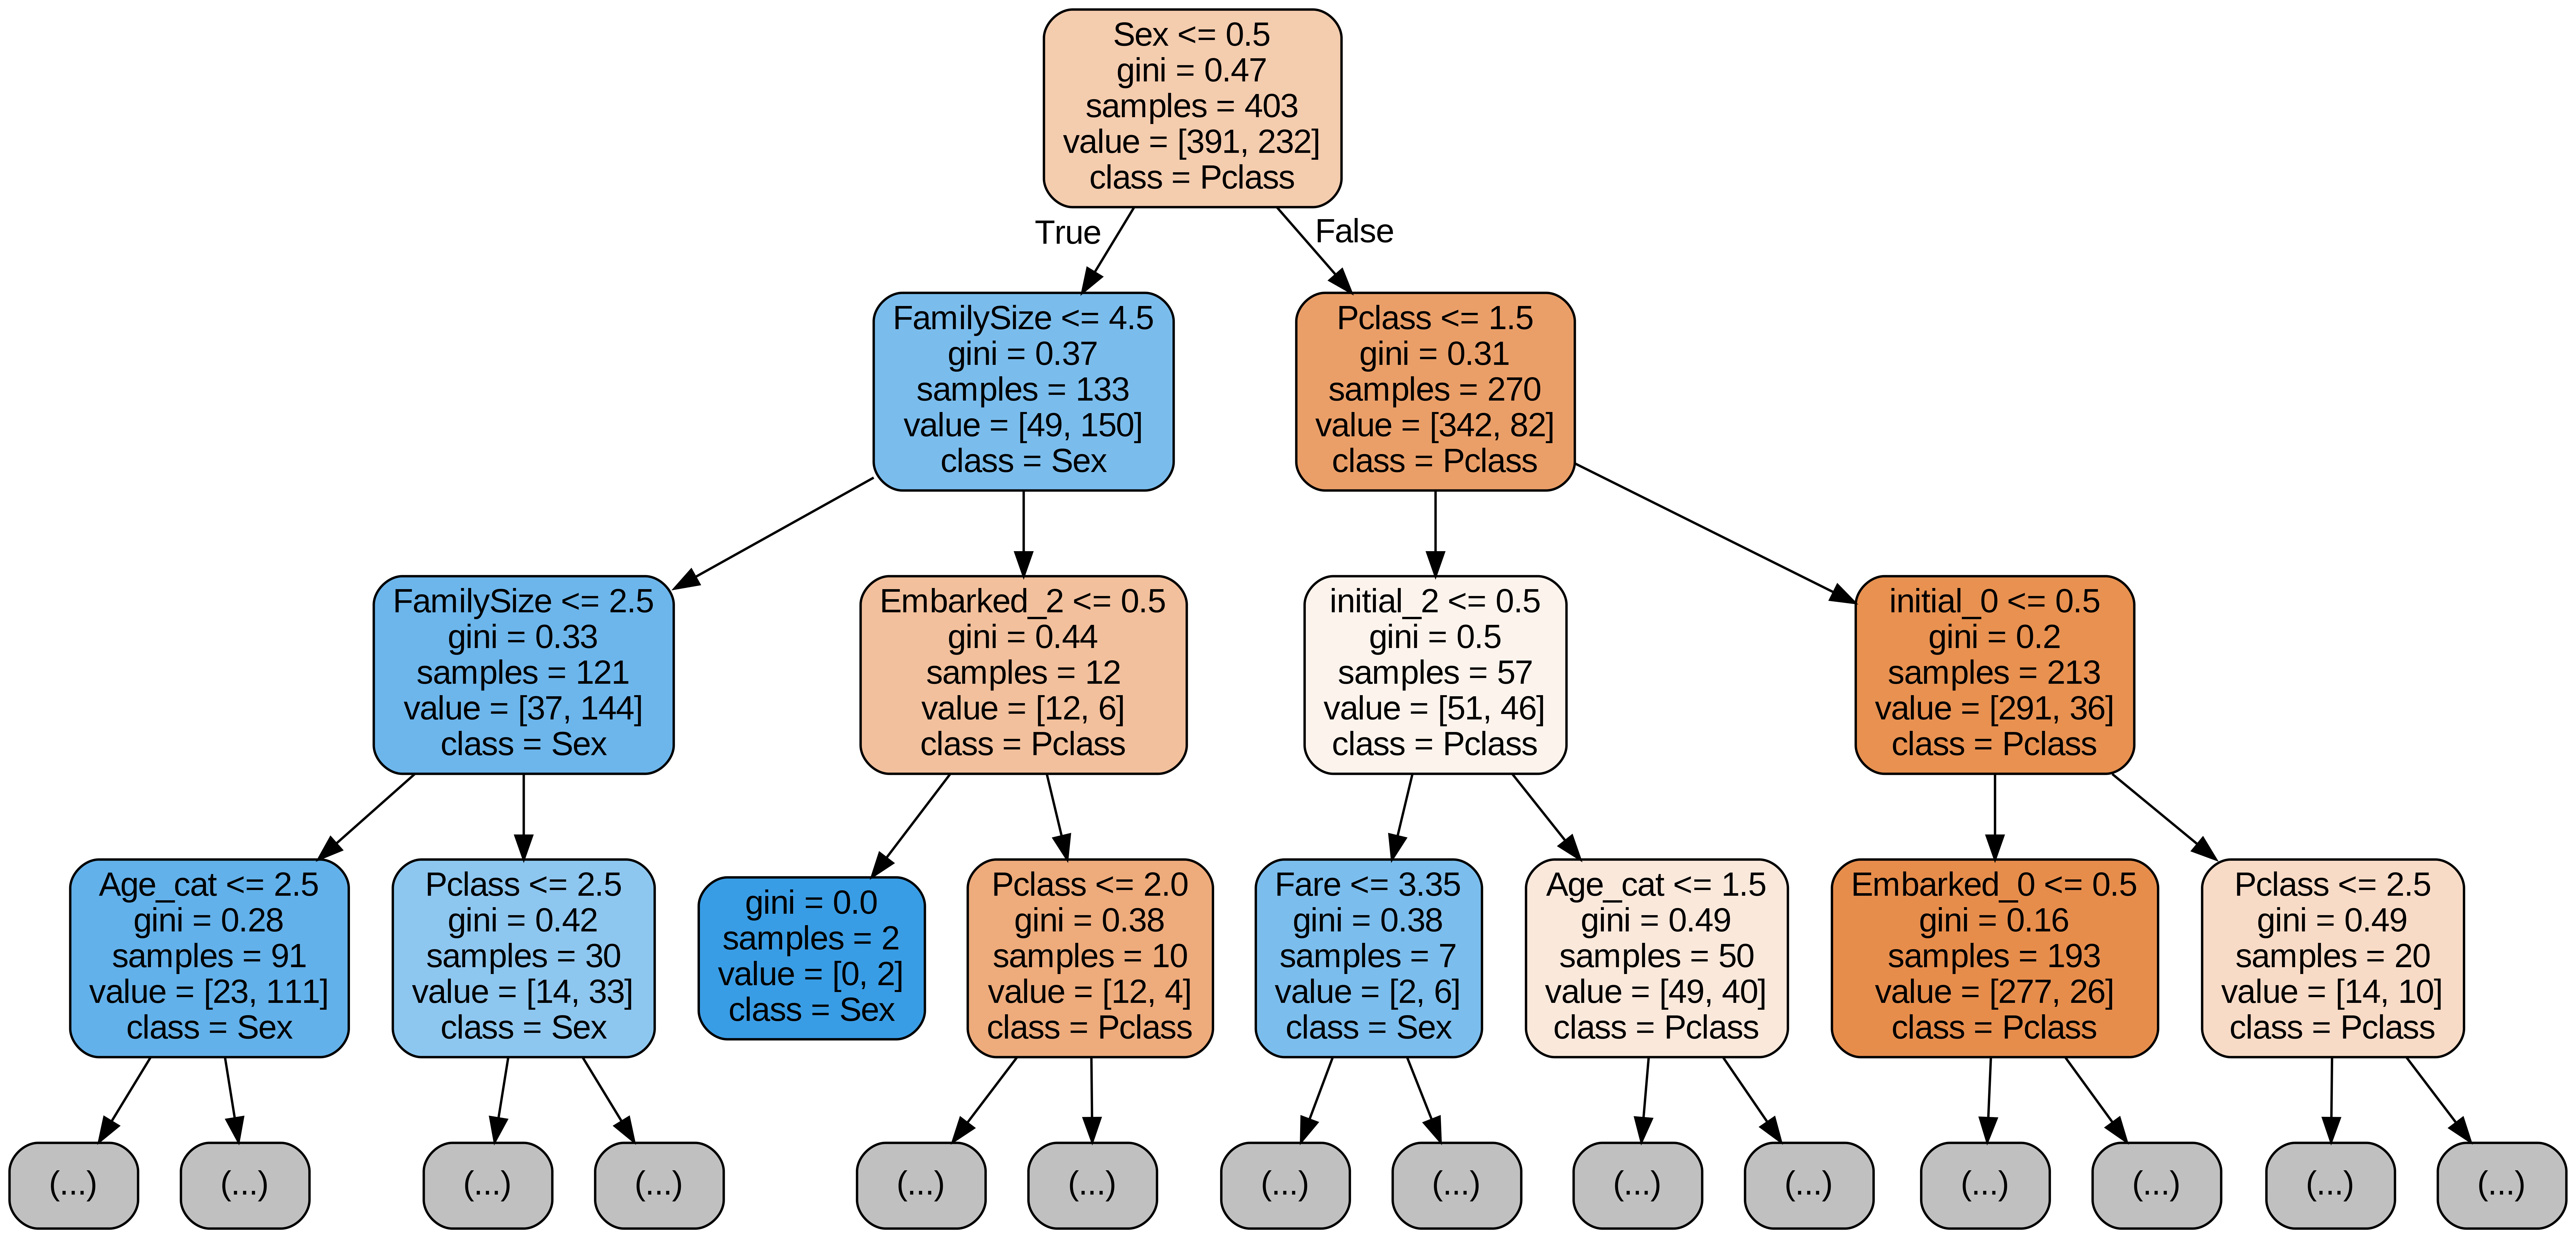

In [268]:
from sklearn.tree import export_graphviz

# Extract single tree
# RandomForestClassifier느 ensemble tree 모델이기 때문에 여러 트리 중의 1개를 골라서 출력
estimator = model.estimators_[0]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = df_train.columns[1:],
                class_names = df_train.columns[1:],
                max_depth = 3,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')